# **Bank Churn Prediction - Deep Learning Neuron Network Model**
## **Author: Sameer Khan**
### **LinkedIn: [Sameer Khan](https://www.linkedin.com/in/sameer-khan-a68a211b2)**
## **Project Overview**
This project focuses on predicting customer churn in a bank using Deep learning models. The dataset contains various customer attributes, and the goal is to identify customers who are likely to leave the bank.

In [1]:
test_url = "/kaggle/input/playground-series-s4e1/test.csv"
train_url ="/kaggle/input/playground-series-s4e1/train.csv"
sample_submision = "/kaggle/input/playground-series-s4e1/sample_submission.csv"

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import plotly as px
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# ML And DL Models

In [2]:

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , ReLU , Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

2025-03-16 00:27:04.107730: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 00:27:04.582620: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 00:27:04.853033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742084825.220245    3201 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742084825.307433    3201 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 00:27:06.217740: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:

data = pd.read_csv("../data/churn/train.csv")

In [4]:

data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#Describtive Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
desc = pd.DataFrame()
desc["Column"] = data.columns
desc["Count"] = data.count().values
desc["Unique"] = data.nunique().values
desc["Null"] = data.isnull().sum().values
desc["% Unique"] = round(data.nunique() / len(data)*100,2).values
desc["Min"] = data.min().values
desc["Max"] = data.max().values
#desc["Mean"] = data.mean().values
desc.sort_values(by= "Unique",ascending=True)

,Column,Count,Unique,Null,% Unique,Min,Max
5,Gender,165034,2,0,0.00,Female,Male
13,Exited,165034,2,0,0.00,0,1
10,HasCrCard,165034,2,0,0.00,0.0,1.0
11,IsActiveMember,165034,2,0,0.00,0.0,1.0
4,Geography,165034,3,0,0.00,France,Spain
9,NumOfProducts,165034,4,0,0.00,1,4
7,Tenure,165034,11,0,0.01,0,10
6,Age,165034,71,0,0.04,18.0,92.0
3,CreditScore,165034,457,0,0.28,350,850
2,Surname,165034,2797,0,1.69,Abazu,Zuyeva


#Preprocessing

## Drop Columns

In [9]:
data.drop(["Surname","CustomerId","id"] , inplace = True , axis = 1)

## Distribution

<Axes: xlabel='Age', ylabel='Count'>

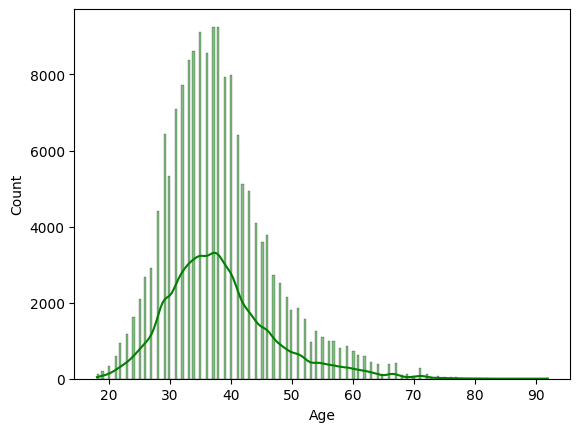

In [10]:
snb.histplot(data["Age"], kde = True , color = "green")

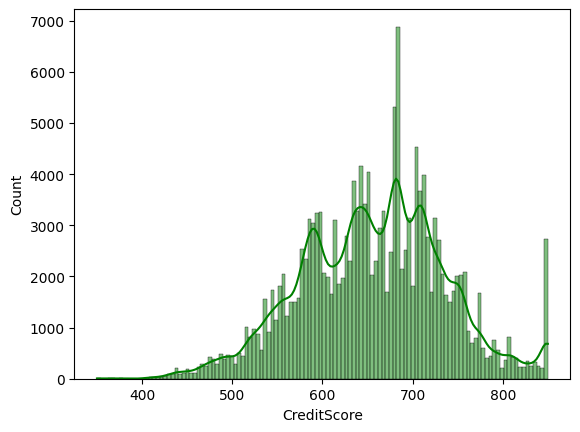

In [12]:
_= snb.histplot(data["CreditScore"] , kde = True , color = "green")

## Feature Engineering
![](../../imgs/featureEngin.png)

In [13]:
data["F_CreditScore"] = pd.cut(data["CreditScore"],bins = [300,500,700,800,900] , labels = ["Low", "Moderate","High","Best"] )

In [14]:
#data["F_Age"] = pd.cut(data["Age"] , bins = [18,30,50,80] , labels = ["Young","Seniors" , "Old"])

In [15]:
#data["Balance"] = np.log1p(data["Balance"])

In [16]:
#data["EstimatedSalary"] = np.log1p(data["EstimatedSalary"])

##Label Encoding

In [17]:
# Initialize dictionary to store encoders for each column
encoders = {}

# Train Data Encoding
for col in data.select_dtypes(include=["object", "category"]):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # ✅ Fit only once on train data
    encoders[col] = le

## Select Best Features

In [18]:
# Select X And Y Feature
x = data.drop("Exited" , axis = 1) # Feature
y = data.Exited # Target

In [19]:

%time
mi_score = mutual_info_classif(x,y)
mi_score = pd.DataFrame({"Features":x.columns , "Mi Score" : mi_score})
mi_score_sort = mi_score.sort_values(by = "Mi Score" , ascending = False)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.48 μs


CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.72 μs


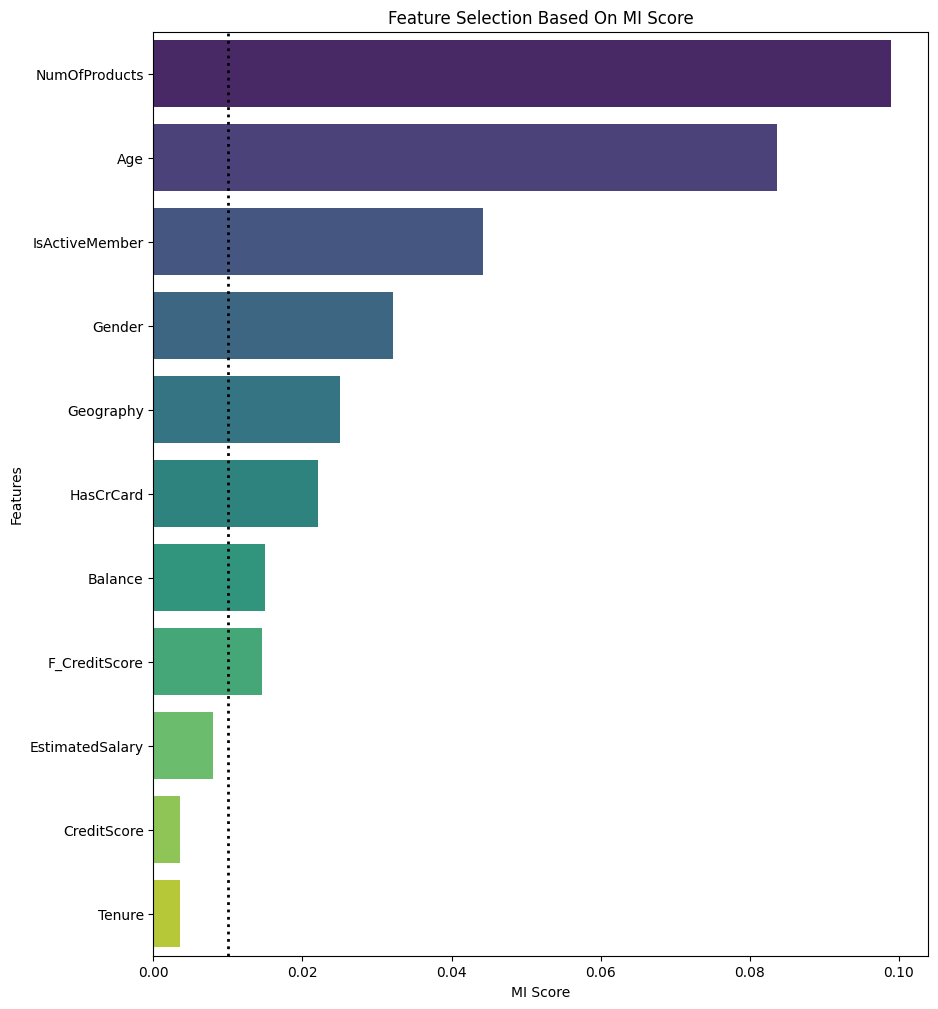

In [20]:

%time
plt.figure(figsize = (10,12))
snb.barplot( x = "Mi Score", y = "Features" , data = mi_score_sort , palette="viridis")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.axvline(x=0.01, color='black', linestyle='dotted', linewidth=2)
plt.title("Feature Selection Based On MI Score")
plt.show()

In [21]:

%time
# Random Forest Model Train Karna
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

# Feature Importance Nikalna
rf_importance = rf.feature_importances_

# Random Forest Scores ko DataFrame me Convert Karna
rf_df = pd.DataFrame({"Feature": x.columns, "RF Score": rf_importance})

# RF Scores ko Descending Order me Sort Karna
rf_df = rf_df.sort_values(by="RF Score", ascending=False)
rf_df

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs


,Feature,RF Score
3,Age,0.232585
9,EstimatedSalary,0.165271
0,CreditScore,0.149144
6,NumOfProducts,0.142548
5,Balance,0.110913
4,Tenure,0.077066
8,IsActiveMember,0.046373
1,Geography,0.031067
2,Gender,0.018288
10,F_CreditScore,0.013519


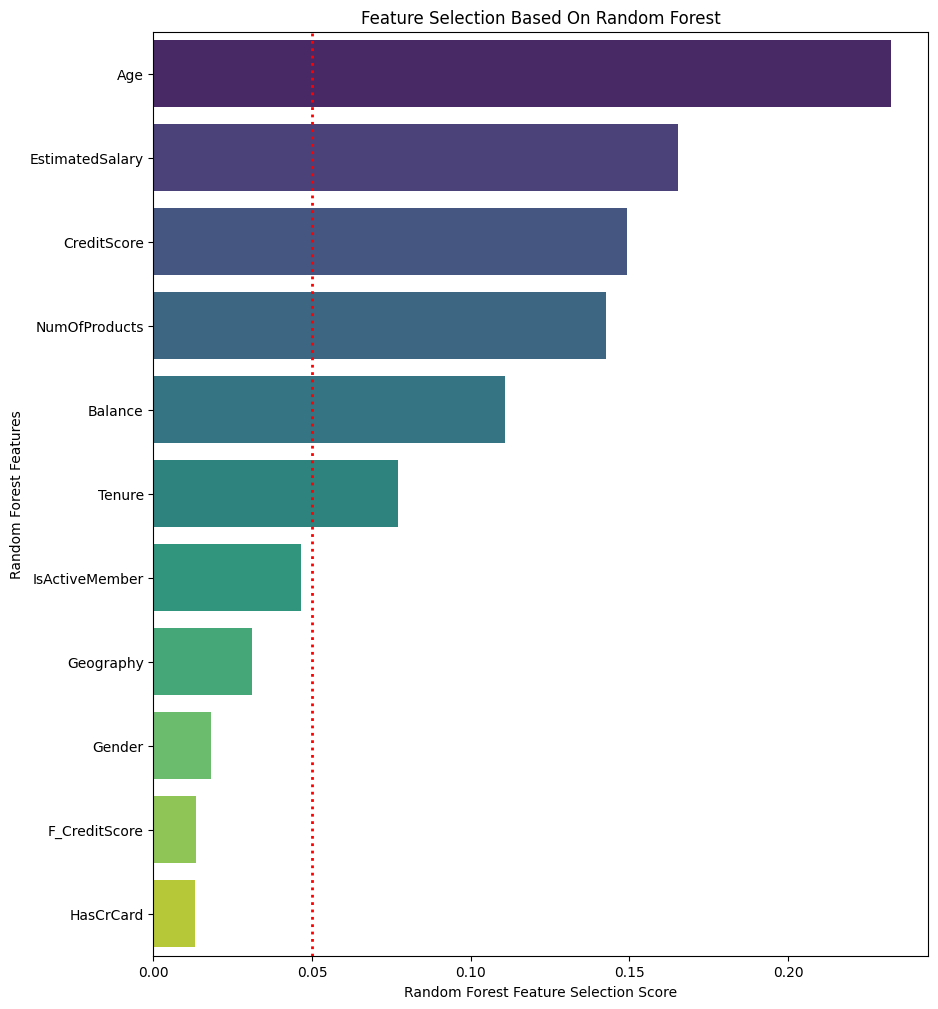

In [22]:
plt.figure(figsize = (10,12))
snb.barplot( x = "RF Score", y = "Feature" , data = rf_df , palette="viridis")
plt.xlabel("Random Forest Feature Selection Score")
plt.ylabel("Random Forest Features")
plt.title("Feature Selection Based On Random Forest")
plt.axvline(x=0.05, color='red', linestyle='dotted', linewidth=2)
plt.show()


In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,F_CreditScore
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,3
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,1



Mutual Score Best Features
- NumOfProducts
- Age
- IsActiveMember
- Gender
- F_Balance
- Geo

# Define Model

In [24]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,F_CreditScore
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,3
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,3
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,3
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,3
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,1


![](../../imgs/dataSplit.jpg)

In [25]:

x = data.drop(["Exited","CreditScore"] , axis = 1 )
y = data.Exited
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Train Test Split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

![](../../imgs/model.png)

In [26]:
model = Sequential()

In [27]:
stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

## Train The Model

In [28]:

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Build the model
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicit input definition
    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(8, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')  # Binary Classification Output
])

# Compile the model
optimizer = Adam(learning_rate=0.005)  # Lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_train, y_train),
                    epochs=50, batch_size=500, callbacks=[stop])  # Increased batch size for stability

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50


2025-03-16 00:29:19.110019: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8122 - loss: 0.4315 - val_accuracy: 0.8630 - val_loss: 0.3269
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3282 - val_accuracy: 0.8618 - val_loss: 0.3289
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8625 - loss: 0.3292 - val_accuracy: 0.8643 - val_loss: 0.3262
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3258 - val_accuracy: 0.8650 - val_loss: 0.3226
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3265 - val_accuracy: 0.8636 - val_loss: 0.3252
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.3254 - val_accuracy: 0.8647 - val_loss: 0.3228
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8656 - loss: 0.3206 - val_accuracy: 0.8649 - val_loss: 0.3212
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3237 - val_accuracy: 0.8647 - val_

#Predict

In [34]:
predict = model.predict(x_test)

   1/1032 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step


In [35]:
predict

array([[0.13622442],
       [0.01672194],
       [0.8885581 ],
       ...,
       [0.4622611 ],
       [0.0069455 ],
       [0.05460074]], dtype=float32)

In [36]:
y_test

33042     0
36330     0
59446     1
92278     0
146750    0
         ..
32661     0
117592    0
2194      0
141678    0
20040     0
Name: Exited, Length: 33007, dtype: int64

# Evaluate The Model

In [37]:
from sklearn.metrics import accuracy_score

# Convert probabilities to binary outputs
predict_binary = (predict > 0.5).astype(int).flatten()  # Convert float predictions to 0 or 1

# Now compute accuracy
accuracy = accuracy_score(y_test, predict_binary)
print(f"Accuracy Score: {accuracy:.4f}")  # Print accuracy correctly

Accuracy Score: 0.8648


**I Get 86% Accuracy On My Test Data**

#Test Data Prediction

In [39]:
test = pd.read_csv("../data/churn/test.csv")
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## Test Data Preprocessing

In [40]:

test["F_CreditScore"] = pd.cut(test["CreditScore"],bins = [300,500,700,800,900] , labels = ["Low", "Moderate","High","Best"] )
test.drop(["id","CustomerId","Surname","CreditScore"] , inplace = True , axis = 1)

In [41]:

# Test Data Encoding
for col in test.select_dtypes(include=["object", "category"]):
    le = encoders[col]  # Get trained encoder

    # Convert test data labels to match the encoder classes
    test[col] = test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [42]:
test.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,F_CreditScore
0,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,3
1,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,3
2,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,3
3,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,3
4,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,1


In [43]:
test["EstimatedSalary"] = np.log1p(test["EstimatedSalary"])
test["Balance"] = np.log1p(test["Balance"])
test = scaler.transform(test)

In [44]:
test_predict = model.predict(test)

   1/3439 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 3s 734us/step


In [ ]:
id = pd.read_csv("../data/churn/test.csv")
print(id.shape)
id = id["id"]
binary = (test_predict > 0.5).astype(int).flatten()
# Assuming `predictions` contains your model's output
submission = pd.DataFrame({
    "id": id,
    "Exited": binary
})

# Save as CSV (without index)
submission.to_csv("../data/submission_2.csv", index=False)

(110023, 13)
